In [5]:
#Exercitiul 1

import numpy as np
# calculez radical din 5 rezolvand ecuatia x^2 - 5 = 0

def newton_rhapson(f, df, x0, epsilon=1e-7):
    """Găsește o soluție a funcției f cu derivata df, aplicând
    metoda lui Newton, pornind din punctul x0.
    """
    # Primul punct este cel primit ca parametru
    prev_x = x0
    # Aplicăm prima iterație
    x = x0 - f(x0) / df(x0)

    # Continuăm să calculăm până avem precizia cerută.
    while abs(x - prev_x) / abs(prev_x) > epsilon:
        x, prev_x = x - f(x) / df(x), x

    return x

# functia x^2 - 5
f = lambda x: x*x - 5

# derivata lui f
df = lambda x: 2 * x

s = newton_rhapson(f, df, 2)

#aproximez solutia la 7 zecimale
print(round(s,7))


2.236068


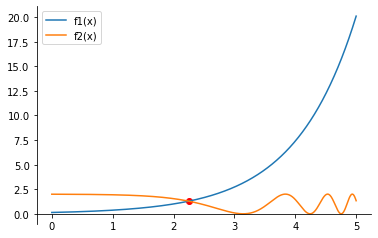

In [6]:
#Exercitiul 2

import matplotlib.pyplot as plt
import math

def newton_rhapson(f, df, x0, epsilon=1e-5):
    """Găsește o soluție a funcției f cu derivata df, aplicând
    metoda lui Newton, pornind din punctul x0.
    """
    # Primul punct este cel primit ca parametru
    prev_x = x0
    # Aplicăm prima iterație
    x = x0 - f(x0) / df(x0)

    # Continuăm să calculăm până avem precizia cerută.
    while abs(x - prev_x) / abs(prev_x) > epsilon:
        x, prev_x = x - f(x) / df(x), x

    return x


# Funcțiile date
f1 = lambda x: math.exp(x-2)
f2 = lambda x: np.cos(math.exp(x-2)) + 1

# fie h(x) = f1(x) - f2(x). Punctul de intersectie va fi dat de h(x) = 0 - rezolvam ciu metoda Newton
h = lambda x: math.exp(x-2) - np.cos(math.exp(x-2)) - 1

# calculam h derivat
dh = lambda x: math.exp(x-2) + np.sin(math.exp(x-2)*math.exp(x-2)) 

# Desenam graficele celor doua functii
fig, ax = plt.subplots(1)

# Configurez axele
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Generez punctele
x = np.linspace(start=0, stop=5, num=1000)

#vectorizez cele doua functii pentru a le afisa graficele
f1_vectorizat = np.vectorize(f1)
f2_vectorizat = np.vectorize(f2)

# Desenez graficul funcției
plt.plot(x, f1_vectorizat(x))
plt.plot(x, f2_vectorizat(x))

# Afișez legenda
plt.legend(['f1(x)', 'f2(x)'])

# calculez punctul de intersectie
s = newton_rhapson(h, dh, 2)

# Desenez punctul de intersectie a celor doua functii
plt.scatter([s], [f1(s)], c='red')

plt.show()

Solutiile derivatei (punctele de inflexiune) sunt: -3.516611478423583 1.5166114784235833
Solutiile ecuatiei sunt:
-3.9999864204974553 11
-2.000000473599974 8
3.9999969519385665 9


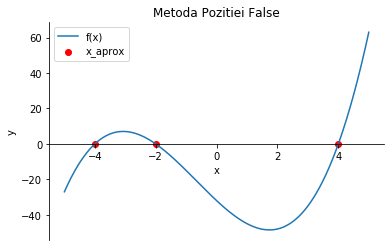

In [7]:
#Exercitiul 3

import math
import matplotlib.pyplot as plt
import numpy as np

def PozitieFalsa(f, a, b, epsilon=1e-5):
    
    """Găsește rădăcina funcției f pe intervalul [a, b]
    cu precizia 'epsilon'.
    """

    # Calculăm valorile în capete
    f_a = f(a)
    f_b = f(b)

    # Trebuie să aibă semne diferite pentru această metodă
    assert f_a * f_b < 0
    
    a0 = a
    b0 = b
    x0 = (a0 * f(b0) - b0 * f(a0)) / (f(b0) - f(a0))
    k = 0
    
    while True:
        
        # crestem nr de iteratii
        k += 1
        
        if f(x0) == 0:
            x1 = x0
            return x1,k
        
        elif f(x0) * f(a0) < 0:
            a1 = a0
            b1 = x0; 
            x1 = (a1 * f (b1) - b1 * f (a1)) / (f (b1) - f (a1))
            
        else:
            a1 = x0
            b1 = b0; 
            x1 = (a1 * f (b1) - b1 * f (a1)) / (f (b1) - f (a1))
          
        # verificam daca punctul e destul de apropiat
        if abs(x1-x0) / abs(x0) < epsilon:
            return x1,k
        
        # reluam iteratia pentru noile valori calculate
        a0 = a1
        b0 = b1
        x0 = x1
        

# Funcția pentru care căutăm soluțiile
f = lambda x: (x ** 3) + 2 * (x ** 2) - 16 * x - 32

# calculam derivata
df =  lambda x: 3 * (x ** 2) + 6 * x - 16

# cautam solutiile ecuatiei derivatei
delta = 36 - 4 * 3 * 16 * (-1)

x1 = (-6 - math.sqrt(delta)) / (2 * 3)
x2 = (-6 + math.sqrt(delta)) / (2 * 3)

print("Solutiile derivatei (punctele de inflexiune) sunt:", x1 , x2)

# Căutăm pe intervalele date
a,n1 = PozitieFalsa(f, -5, x1)
b,n2 = PozitieFalsa(f, x1, x2)
c,n3 = PozitieFalsa(f, x2, 5)

# afisam solutiile ecuatiei
print("Solutiile ecuatiei sunt:")
print(a, n1)
print(b, n2)
print(c, n3)

## Afișez rezultatul
fig, ax = plt.subplots()

# Pun un titlu
plt.title('Metoda Pozitiei False')

# Configurez axele
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Generez punctele
x = np.linspace(start= -5, stop= 5, num = 1000)

# Funcția pentru care căutăm soluțiile
f = lambda x: (x ** 3) + 2 * (x ** 2) - 16 * x - 32

# Desenez graficul funcției
plt.plot(x, f(x))

# Desenez soluțiile
plt.scatter([a, b, c], [0, 0, 0], c='red')

# Afișez legenda
plt.legend(['f(x)', 'x_aprox'])

# Etichetez axele
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Solutiile sunt: -1.1547005383792515 1.1547005383792515
-1.999999999863293 6
0.0 7
2.00000000007642 9


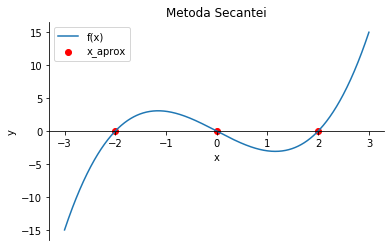

In [8]:
#Exercitiul 4

import math
import matplotlib.pyplot as plt
import numpy as np

def Secanta(f, a, b, x0, x1, epsilon=1e-5):
    
    """Găsește rădăcina funcției f pe intervalul [a, b]
    cu precizia 'epsilon'.
    """

    k = 0
    
    # tratez cazul cand x0 = 0 si nu pot imparti la 0
    try:
        while abs(x1-x0) / abs(x0) >= epsilon:

            # crestem nr de iteratii
            k += 1

            if f(x0) == 0:
                return x0,k

            x2 = (x0 * f(x1) - x1 * f(x0)) / (f(x1) - f(x0))

            if x2 < a or x2 > b:
                print("Introduceti alte valori pentru x0, x1")
                return

            x0 = x1
            x1 = x2
            
    # daca x0 = 0 nu pot imparti la x0 si verific daca este solutie
    except:
        if f(x0) == 0:
                return x0,k
        else:
            return 0,"Nu se poate imparti la 0"

    return x2, k
        

# Funcția pentru care căutăm soluțiile
f = lambda x: (x ** 3) - 4 * x  

# calculam derivata functiei
df =  lambda x: 3 * (x ** 2) - 4

# cautam solutiile ecuatiei derivatei (punctele de inflexiune ale functiei)
delta = - (4 * 3 * (-4))

x1 = ( - math.sqrt(delta)) / (2 * 3)
x2 = (   math.sqrt(delta)) / (2 * 3)

print("Solutiile sunt:", x1 , x2)

# Căutăm pe intervalele date si afisez solutiile
a,n1 = Secanta(f, -3, x1, -3, -1.7)
b,n2 = Secanta(f, x1, x2, 0.2, 0.5)
c,n3 = Secanta(f, x2, 3, 1, 3)
print(a, n1)
print(b, n2)
print(c, n3)


## Afișez rezultatul
fig, ax = plt.subplots()

# Pun un titlu
plt.title('Metoda Secantei')

# Configurez axele
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Generez punctele
x = np.linspace(start= -3, stop= 3, num = 1000)

# Desenez graficul funcției
plt.plot(x, f(x))

# Desenez soluțiile
plt.scatter([a,b,c], [0,0,0], c='red')

# Afișez legenda
plt.legend(['f(x)', 'x_aprox'])

# Etichetez axele
plt.xlabel('x')
plt.ylabel('y')

plt.show()